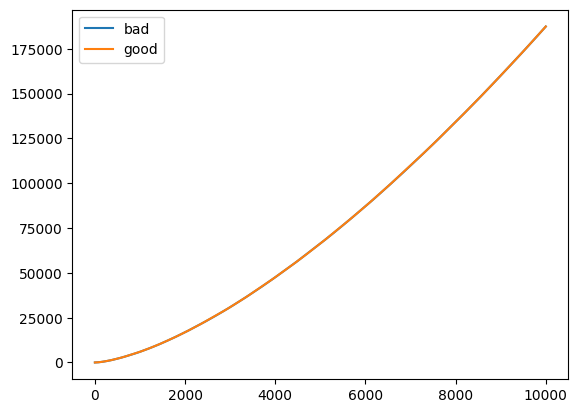

-0.8296150900264723


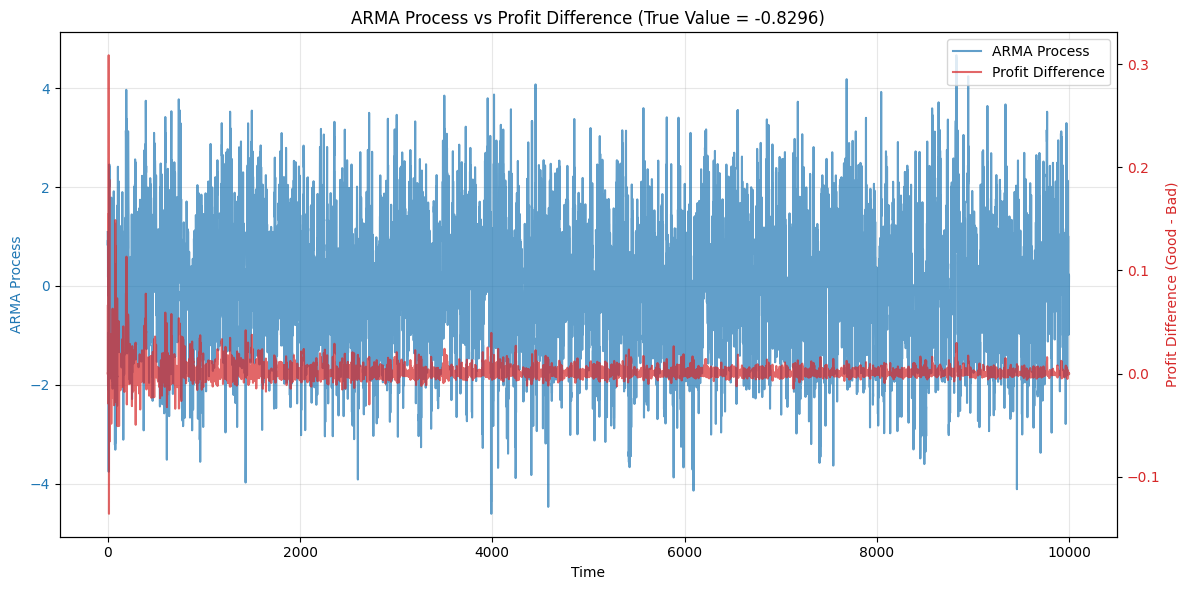

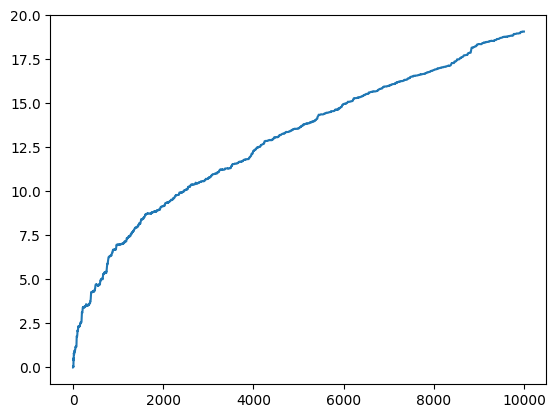

19.064504565292737


In [ ]:
#ToDo
# find real stock data that is sampled at a constant rate
# first by yourself determine what it is ARMA(p, q) based on statsmodel - in homework
# then switch the get_ma_process function to the real stock data
# then change the predict_next_ar2 function to predict based on ARMA(p, q) and past data

import numpy as np
from statsmodels.tsa.arima_process import ArmaProcess
from matplotlib import pyplot as plt

def get_ma_process(phi0, phi1, T):
    ar_process = ArmaProcess([1, -phi0, -phi1], [1])
    return ar_process.generate_sample(nsample=T)

def predict_next_ar2(u_series, phi0, phi1, t):
    """Predict the next value in an AR(2) process"""
    if t < 2:
        return 0  # Not enough history
    return phi0 * u_series[t-1] + phi1 * u_series[t-2]

    
def run_simulation(phi0, phi1):
    # parameters
    T = 10000
    v = np.random.normal(0, 1.0)
    sigma_u = sigma_v = 1.0
    thetas = np.zeros(T)
    u = get_ma_process(phi0, phi1, T)
    # plt.plot(u)
    # plt.show()
    q = 0.0
    profits_bad = np.zeros(T)
    profits_good = np.zeros(T)
    for k in range(T):
        var_q = thetas[k]**2 * sigma_v**2 + (4/3) * sigma_u**2 * (1 - (1/4)**(k+1))
        lambda_k = sigma_v / np.sqrt(var_q + 4 * sigma_u**2)
        
        noise_before = []
        for i in range(1, 3):
            if k-i >= 0:
                noise_before.append(u[k-i])
        best_guess = predict_next_ar2(u, phi0, phi1, k)
        x_good = (v - lambda_k*(q + best_guess)) / (2*lambda_k)
        x_bad = (v - lambda_k*(q)) / (2*lambda_k)
        price_bad = lambda_k*(x_bad + q + u[k])
        price_good = lambda_k*(x_good + q + u[k])
        profit_bad = (v - price_bad)*x_bad
        profit_good = (v - price_good)*x_good
        profits_bad[k] = profit_bad
        profits_good[k] = profit_good
        if k < T-1:
            thetas[k+1] = thetas[k]/2 + 1/(2*lambda_k)

    # plt.plot(profits_bad, label='bad')
    # plt.plot(profits_good, label='good')
    # plt.legend()
    # plt.show()
    cum_profits_bad = np.cumsum(profits_bad)
    cum_profits_good = np.cumsum(profits_good)
    plt.plot(cum_profits_bad, label='bad')
    plt.plot(cum_profits_good, label='good')
    plt.legend()
    plt.show()
    print(v)

    # Create dual y-axis plot showing ARMA process and profit difference
    fig, ax1 = plt.subplots(figsize=(12, 6))
    
    # Plot ARMA process on left y-axis
    color = 'tab:blue'
    ax1.set_xlabel('Time')
    ax1.set_ylabel('ARMA Process', color=color)
    ax1.plot(u, color=color, alpha=0.7, label='ARMA Process')
    ax1.tick_params(axis='y', labelcolor=color)
    
    # Create right y-axis and plot profit difference
    ax2 = ax1.twinx()
    color = 'tab:red'
    profit_diff = profits_good - profits_bad
    ax2.set_ylabel('Profit Difference (Good - Bad)', color=color)
    ax2.plot(profit_diff, color=color, alpha=0.7, label='Profit Difference')
    ax2.tick_params(axis='y', labelcolor=color)
    
    # Add title and grid
    plt.title(f"ARMA Process vs Profit Difference (True Value = {v:.4f})")
    ax1.grid(True, alpha=0.3)
    
    # Add legend for both lines
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
    
    plt.tight_layout()
    plt.show()
    
    return cum_profits_good - cum_profits_bad  # cumulative difference

dif = run_simulation(0.4, 0.3)
plt.plot(dif)
plt.show()
print(dif[-1])
